# Error Backpropagation

# I. 실습용 데이터 생성

In [0]:
import numpy as np

> ## 1) Input : X(4 * 3)

In [5]:
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

> ## 2) Output : y(4 * 1)

In [6]:
y = np.array([0., 1., 1., 0.]).reshape(4, 1)

y

array([[0.],
       [1.],
       [1.],
       [0.]])

> ## 3) W1(3 * 4)

In [8]:
np.random.seed(2045)
W1 = np.random.rand(3, 4)

W1

array([[0.84417125, 0.88556227, 0.13949022, 0.06054265],
       [0.19244713, 0.53239095, 0.1545375 , 0.82746441],
       [0.92020641, 0.01485351, 0.48974821, 0.6919893 ]])

> ## 4) W2(4 * 1)

In [11]:
np.random.seed(2046)
W2 = np.random.rand(4)

W2 = W2.reshape(4, 1)
W2

array([[0.89499214],
       [0.59607849],
       [0.43556375],
       [0.15307302]])

> ## 5) y_hat(4 * 1)

In [10]:
y_hat = np.zeros([4, 1])

y_hat

array([[0.],
       [0.],
       [0.],
       [0.]])

> ## 6) Layer1(4 * 4)

In [13]:
Layer1 = np.ones([4, 4])

Layer1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

> ## 7) TR_Net

* np.array([X, y, W1, W2, y_hat, Layer1])

In [14]:
TR_Net = np.array([X, y, W1, W2, y_hat, Layer1])
TR_Net

array([array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]]),
       array([[0.],
       [1.],
       [1.],
       [0.]]),
       array([[0.84417125, 0.88556227, 0.13949022, 0.06054265],
       [0.19244713, 0.53239095, 0.1545375 , 0.82746441],
       [0.92020641, 0.01485351, 0.48974821, 0.6919893 ]]),
       array([[0.89499214],
       [0.59607849],
       [0.43556375],
       [0.15307302]]),
       array([[0.],
       [0.],
       [0.],
       [0.]]),
       array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])], dtype=object)

# II. 함수 정의

> ## 1) sigmoid( )

* Activation Function

In [0]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

> ## 2) d_sigmoid( )

* sigmoid( ) 미분함수

In [0]:
def d_sigmoid(x):
    dy = x * (1.0 - x)
    return dy

> ## 3)Loss function

* Mean Squared Error

In [0]:
def loss_function(x):
  Loss = np.mean((x[1] - x[4]) ** 2)
  return Loss

# III. 순방향과 역방향 함수 정의

> ## 1) Forward_Propagation

* Layer1 = sigmoid(np.dot(X, W1))
* y_hat = sigmoid(np.dot(Layer1, W2))

In [0]:
def forwardProp(FPG):
    FPG[5] = sigmoid(np.dot(FPG[0], FPG[2]))
    FPG[4] = sigmoid(np.dot(FPG[5], FPG[3]))
    return FPG

> ## 2) Back_Propagation

* d_W2 = np.dot((-2 * (y - y_hat) * d_sigmoid(y_hat)), Layer1)

* d_W1 = np.dot((-2 * (y - y_hat) * d_sigmoid(y_hat)), np.transpose(W2))
* d_W1 = d_W1 * d_sigmoid(Layer1)
* d_W1 = np.dot(np.transpose(X), d_W1)

* W1 = W1 - (0.001 * d_W1)
* W2 = W2 - (0.001 * d_W2)

In [0]:
def backProp(EBP):
    d_W2 = np.dot(np.transpose(EBP[5]), (-2 * (EBP[1] - EBP[4]) * d_sigmoid(EBP[4])))

    d_W1 = np.dot((-2 * (EBP[1] - EBP[4]) * d_sigmoid(EBP[4])), np.transpose(EBP[3]))
    d_W1 = d_W1 * d_sigmoid(EBP[5])
    d_W1 = np.dot(np.transpose(EBP[0]), d_W1)

    EBP[2] = EBP[2] - d_W1
    EBP[3] = EBP[3] - d_W2
    return EBP

# IV. 오차역전파를 적용한 Gradient Descent

* 학습 과정의 Loss 값 저장 객체

In [0]:
Loss_Record = []

> ## 1) Learning with Error Backpropagation

In [0]:
for k in range(0, 1000):
    TR_Net = forwardProp(TR_Net)
    TR_Net = backProp(TR_Net)
    Loss_Record.append(loss_function(TR_Net))

> ## 2) Parameter Update Check

* W1

In [23]:
TR_Net[2]

array([[ 2.16523871,  4.55650374,  6.25245964, -4.31284814],
       [ 2.45299341,  4.88436665, -2.95354247,  6.58045993],
       [ 1.54732553, -0.55239455,  0.30706475,  1.49761882]])

* W2

In [24]:
TR_Net[3]

array([[ 3.89047083],
       [ 7.40228373],
       [-7.35423621],
       [-7.36352248]])

* y_hat

In [25]:
TR_Net[4]

array([[0.0128413 ],
       [0.96366465],
       [0.96466223],
       [0.04426331]])

> ## 3) Visualization

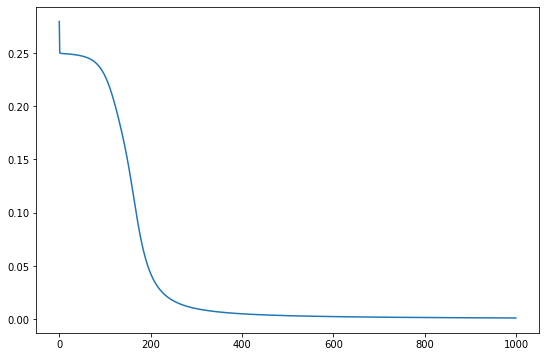

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.plot(Loss_Record)
plt.show()

# 
# 
# 
# The End
# 
# 
# 